In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from keras.layers import Input, Flatten, GlobalAveragePooling2D



In [3]:
#mc_pion = pd.read_csv("Pion_300MeV_500000_1photon_0plus.txt")
#mc_compton = pd.read_csv("Compton_300MeV_20000_1photon_0plus.txt")
###########################################################################
mc_pion = pd.read_csv("Pion_1p1g_300MeV_recon_test.txt")
mc_compton = pd.read_csv("Compton_300MeV_recon_test.txt")
###########################################################################
#mc_pion = pd.read_csv("AcquMC_proton_Pion_Photon1_300MeV_10000.txt")
#mc_compton = pd.read_csv("AcquMC_proton_Compton_300MeV_10000.txt")
#mc_compton.head()

#mc_compton['id'] = mc_compton['id'].replace([2], 1)

mc_pion['id'] = mc_pion['id'].replace([2], 0)

mc_sum = mc_compton.append(mc_pion, ignore_index=True)

mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
#################
mc_sum.drop(["phi_p"], axis = 1, inplace = True)
mc_sum.drop(["E_p"], axis = 1, inplace = True)
################
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)
#mc_sum.drop(["phi_p"], axis = 1, inplace = True)

mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] > 40.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] < 150.]
#mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] > 940.]
#mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] < 1030.]

mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


C:\Users\Khach\AppData\Local\Temp\ipykernel_15288\3016723492.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [4]:
mc_sum

,E_gamma,theta_gamma,theta_p,MM,id
0,165.880,110.857,29.662,999.076,1
1,186.952,114.536,30.387,966.831,1
2,193.474,142.199,16.757,934.529,1
3,195.706,107.188,29.595,961.759,1
4,218.917,106.207,34.185,930.321,1
...,...,...,...,...,...
11452,83.407,89.429,11.163,1112.901,0
11453,80.534,104.276,8.104,1110.506,0
11454,130.215,98.499,15.649,1053.794,0
11455,86.721,115.130,6.740,1098.947,0


In [6]:
mc_sum_reshuffle3[mc_sum_reshuffle3.select_dtypes(np.float64).columns] = mc_sum_reshuffle3.select_dtypes(np.float64).astype(np.float32)


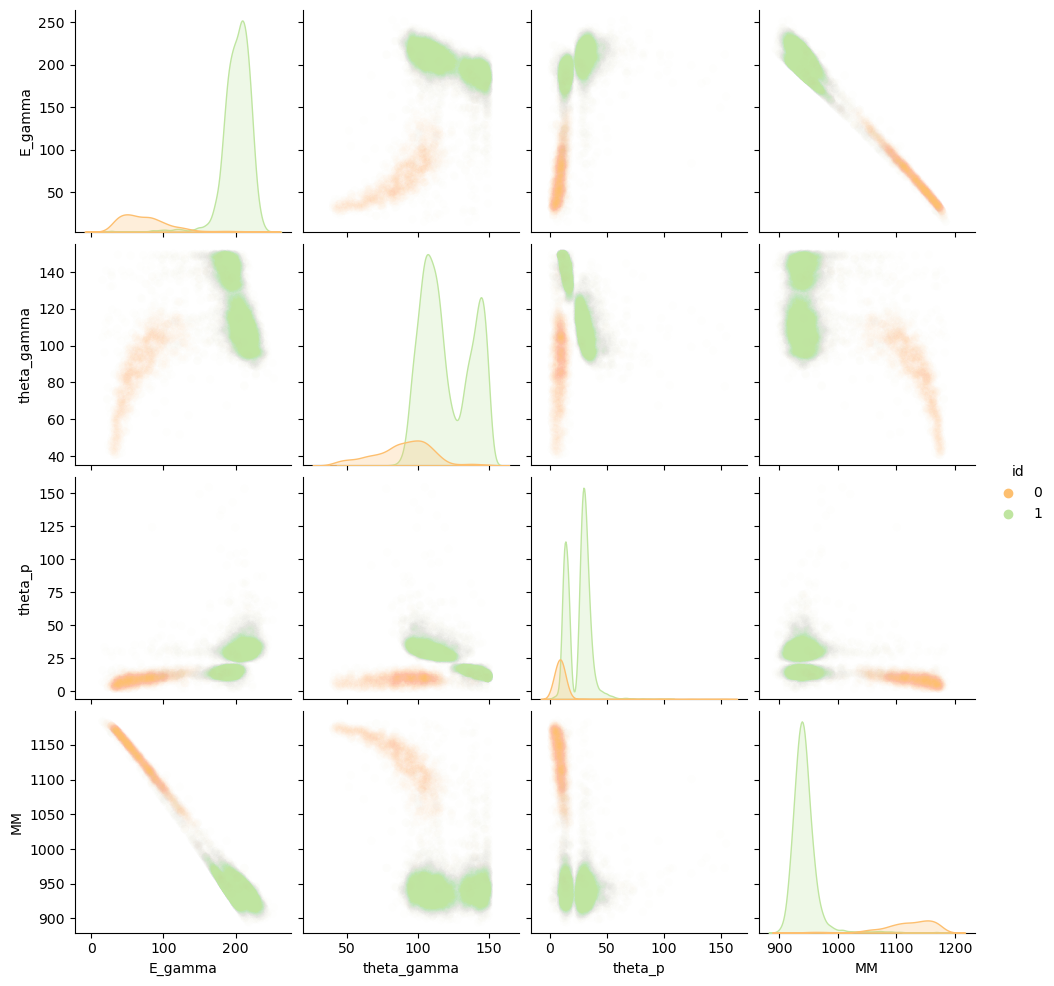

In [36]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.01}, palette='Spectral')

<AxesSubplot:>

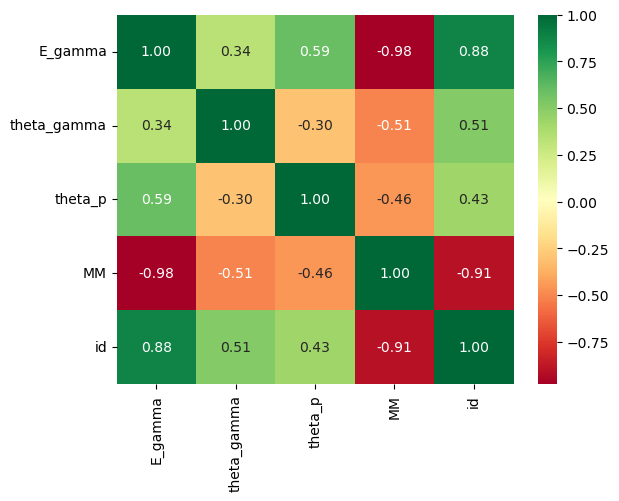

In [37]:
sns.heatmap(mc_sum_reshuffle2.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [7]:

 # retrieve numpy array
dataset = mc_sum_reshuffle3.values
 # split into input (X) and output (y) variables
X = dataset[:,0 :4]
y = dataset[:,4]

In [6]:
mc_sum_reshuffle3

,E_gamma,theta_gamma,theta_p,MM,id
0,219.640,108.157,30.851,926.977,1
1,201.904,112.963,27.830,947.116,1
2,68.669,81.762,11.644,1131.587,0
3,40.947,51.456,8.101,1165.596,0
4,179.319,141.096,13.746,957.308,1
...,...,...,...,...,...
11452,186.113,141.255,10.244,946.693,1
11453,223.899,101.986,35.498,928.404,1
11454,220.414,101.239,33.979,934.184,1
11455,220.103,112.822,34.023,920.848,1


In [41]:
X.dtype

dtype('float64')

In [8]:
mc_sum_reshuffle3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 11456
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      9923 non-null   float64
 1   theta_gamma  9923 non-null   float64
 2   theta_p      9923 non-null   float64
 3   MM           9923 non-null   float64
 4   id           9923 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 465.1 KB


In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
####################
X_test_unscaled = X_test
# prepare input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#y_train

array([3818,  664, 2032, ..., 3710,  971,  934], dtype=int64)

In [10]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
#y_train_enc = le.transform(np.ravel(y_train,order='C'))
#y_test_enc = le.transform(np.ravel(y_test,order='C'))

In [150]:
X_train

array([[0.        , 0.47830332, 0.39258113, 0.54545455, 0.54186468],
       [0.        , 0.61779557, 0.27353399, 0.54545455, 0.44030648],
       [0.        , 0.57349925, 0.43817625, 0.54545455, 0.34455609],
       ...,
       [0.        , 0.55311406, 0.47791618, 0.72727273, 0.33837123],
       [0.        , 0.40012191, 0.68601693, 0.45454545, 0.41798444],
       [0.        , 0.26139474, 0.76663339, 0.72727273, 0.61376798]])

In [11]:
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(2, activation='relu', kernel_initializer='he_normal'))
#model.add(Flatten())
#model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)
#model.history.history
# evaluate the keras model
#_, accuracy = model.evaluate(X_test, y_test, verbose=0)
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/200
416/416 - 4s - loss: 0.6302 - accuracy: 0.7992 - 4s/epoch - 9ms/step
Epoch 2/200
416/416 - 1s - loss: 0.4815 - accuracy: 0.9747 - 1s/epoch - 3ms/step
Epoch 3/200
416/416 - 1s - loss: 0.3698 - accuracy: 0.9824 - 1s/epoch - 3ms/step
Epoch 4/200
416/416 - 1s - loss: 0.2882 - accuracy: 0.9832 - 1s/epoch - 3ms/step
Epoch 5/200
416/416 - 1s - loss: 0.2306 - accuracy: 0.9830 - 1s/epoch - 3ms/step
Epoch 6/200
416/416 - 1s - loss: 0.1893 - accuracy: 0.9832 - 983ms/epoch - 2ms/step
Epoch 7/200
416/416 - 2s - loss: 0.1384 - accuracy: 0.9823 - 2s/epoch - 4ms/step
Epoch 8/200
416/416 - 1s - loss: 0.0746 - accuracy: 0.9823 - 1s/epoch - 3ms/step
Epoch 9/200
416/416 - 1s - loss: 0.0660 - accuracy: 0.9833 - 1s/epoch - 3ms/step
Epoch 10/200
416/416 - 1s - loss: 0.0631 - accuracy: 0.9835 - 1s/epoch - 3ms/step
Epoch 11/200
416/416 - 1s - loss: 0.0618 - accuracy: 0.9844 - 1s/epoch - 3ms/step
Epoch 12/200
416/416 - 1s - loss: 0.0610 - accuracy: 0.9845 - 1s/epoch - 3ms/step
Epoch 13/200
416/416 -

Epoch 101/200
416/416 - 2s - loss: 0.0416 - accuracy: 0.9896 - 2s/epoch - 4ms/step
Epoch 102/200
416/416 - 1s - loss: 0.0413 - accuracy: 0.9899 - 1s/epoch - 3ms/step
Epoch 103/200
416/416 - 1s - loss: 0.0410 - accuracy: 0.9895 - 1s/epoch - 3ms/step
Epoch 104/200
416/416 - 1s - loss: 0.0409 - accuracy: 0.9901 - 1s/epoch - 3ms/step
Epoch 105/200
416/416 - 1s - loss: 0.0406 - accuracy: 0.9901 - 1s/epoch - 3ms/step
Epoch 106/200
416/416 - 2s - loss: 0.0403 - accuracy: 0.9901 - 2s/epoch - 4ms/step
Epoch 107/200
416/416 - 1s - loss: 0.0401 - accuracy: 0.9901 - 1s/epoch - 3ms/step
Epoch 108/200
416/416 - 1s - loss: 0.0399 - accuracy: 0.9902 - 1s/epoch - 3ms/step
Epoch 109/200
416/416 - 1s - loss: 0.0396 - accuracy: 0.9901 - 1s/epoch - 3ms/step
Epoch 110/200
416/416 - 1s - loss: 0.0394 - accuracy: 0.9901 - 1s/epoch - 3ms/step
Epoch 111/200
416/416 - 1s - loss: 0.0391 - accuracy: 0.9902 - 1s/epoch - 3ms/step
Epoch 112/200
416/416 - 1s - loss: 0.0389 - accuracy: 0.9904 - 1s/epoch - 3ms/step
Epoc

Epoch 200/200
416/416 - 1s - loss: 0.0292 - accuracy: 0.9923 - 1s/epoch - 3ms/step


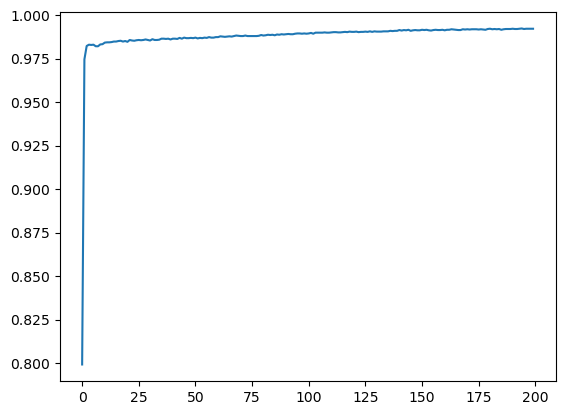

In [12]:
plt.plot(model.history.history['accuracy'])
##history
#model_loss = pd.DataFrame(model.history.history)
#model_loss
#sns.histplot(data = model_loss, x = "accuracy")

In [13]:
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)


Epoch 1/200
416/416 - 1s - loss: 0.0293 - accuracy: 0.9922 - 972ms/epoch - 2ms/step
Epoch 2/200
416/416 - 1s - loss: 0.0292 - accuracy: 0.9926 - 1s/epoch - 3ms/step
Epoch 3/200
416/416 - 1s - loss: 0.0291 - accuracy: 0.9925 - 1s/epoch - 3ms/step
Epoch 4/200
416/416 - 1s - loss: 0.0291 - accuracy: 0.9925 - 1s/epoch - 3ms/step
Epoch 5/200
416/416 - 1s - loss: 0.0290 - accuracy: 0.9923 - 1s/epoch - 3ms/step
Epoch 6/200
416/416 - 1s - loss: 0.0291 - accuracy: 0.9922 - 1s/epoch - 3ms/step
Epoch 7/200
416/416 - 1s - loss: 0.0290 - accuracy: 0.9922 - 1s/epoch - 3ms/step
Epoch 8/200
416/416 - 1s - loss: 0.0290 - accuracy: 0.9925 - 1s/epoch - 3ms/step
Epoch 9/200
416/416 - 1s - loss: 0.0289 - accuracy: 0.9925 - 1s/epoch - 4ms/step
Epoch 10/200
416/416 - 2s - loss: 0.0289 - accuracy: 0.9922 - 2s/epoch - 4ms/step
Epoch 11/200
416/416 - 1s - loss: 0.0289 - accuracy: 0.9922 - 1s/epoch - 4ms/step
Epoch 12/200
416/416 - 1s - loss: 0.0288 - accuracy: 0.9925 - 1s/epoch - 3ms/step
Epoch 13/200
416/416 -

Epoch 101/200
416/416 - 1s - loss: 0.0273 - accuracy: 0.9937 - 1s/epoch - 2ms/step
Epoch 102/200
416/416 - 1s - loss: 0.0273 - accuracy: 0.9938 - 926ms/epoch - 2ms/step
Epoch 103/200
416/416 - 1s - loss: 0.0273 - accuracy: 0.9937 - 1s/epoch - 2ms/step
Epoch 104/200
416/416 - 1s - loss: 0.0271 - accuracy: 0.9937 - 1s/epoch - 3ms/step
Epoch 105/200
416/416 - 1s - loss: 0.0272 - accuracy: 0.9938 - 1s/epoch - 3ms/step
Epoch 106/200
416/416 - 1s - loss: 0.0271 - accuracy: 0.9941 - 1s/epoch - 3ms/step
Epoch 107/200
416/416 - 1s - loss: 0.0272 - accuracy: 0.9935 - 1s/epoch - 3ms/step
Epoch 108/200
416/416 - 1s - loss: 0.0271 - accuracy: 0.9938 - 1s/epoch - 3ms/step
Epoch 109/200
416/416 - 1s - loss: 0.0271 - accuracy: 0.9937 - 1s/epoch - 3ms/step
Epoch 110/200
416/416 - 1s - loss: 0.0271 - accuracy: 0.9941 - 1s/epoch - 3ms/step
Epoch 111/200
416/416 - 1s - loss: 0.0272 - accuracy: 0.9940 - 1s/epoch - 3ms/step
Epoch 112/200
416/416 - 1s - loss: 0.0271 - accuracy: 0.9938 - 1s/epoch - 3ms/step
E

416/416 - 1s - loss: 0.0266 - accuracy: 0.9938 - 1s/epoch - 3ms/step
Epoch 200/200
416/416 - 1s - loss: 0.0265 - accuracy: 0.9938 - 1s/epoch - 3ms/step


In [16]:
#predictions = model.predict(X_test)
#predictions = np.round(predictions).astype(int)
predictions = (model.predict(X_test) > 0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

103/103 [==============================] - 0s 3ms/step


In [17]:
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       433
           1       1.00      1.00      1.00      2842

    accuracy                           0.99      3275
   macro avg       0.99      0.98      0.99      3275
weighted avg       0.99      0.99      0.99      3275



In [44]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
predictions.dtype

dtype('int32')

In [51]:
X_test

array([[0.83804875, 0.57667602, 0.25610083, 0.15455885],
       [0.86889863, 0.65038697, 0.17409182, 0.0858548 ],
       [0.72377845, 0.84006908, 0.09425316, 0.19382726],
       ...,
       [0.75876176, 0.93898996, 0.07755718, 0.12268505],
       [0.85222049, 0.55178589, 0.20618941, 0.14955016],
       [0.8397565 , 0.52398096, 0.2154003 , 0.17597292]])

In [21]:
#address = [predictions] 
#X_test_df["id_predicted"] = predictions
#y_test_array = y_test.to_numpy() 
#X_test["id_initial"] = y_test_array
#difference = predictions - y_test_array 
#X_test["difference"] = difference
#X_test.head(50)

# creating a list of index names
#index_values = [1, 2, 3, 4]
index_values = list(range(1, 3276))
   
# creating a list of column names
column_values = ['E_gamma', 'theta_gamma', 
                 'theta_p', 'MM']

# creating the dataframe
X_test_df = pd.DataFrame(data = X_test_unscaled, 
                  index = index_values, 
                  columns = column_values)
X_test_df["id_initial"] = y_test.astype(int)
X_test_df["id_predicted"] = predictions



In [22]:
X_test_df

,E_gamma,theta_gamma,theta_p,MM,id_initial,id_predicted
1,212.913,107.047,27.019,937.861,1,1
2,210.813,100.011,34.433,948.835,1,1
3,232.502,99.938,35.597,918.939,1,1
4,211.522,104.705,28.929,942.485,1,1
5,132.654,100.841,16.852,1049.288,0,0
...,...,...,...,...,...,...
3271,229.116,104.693,40.895,917.616,1,1
3272,32.384,46.559,5.192,1173.831,0,0
3273,237.957,95.310,34.641,917.507,1,1
3274,196.042,138.718,14.022,932.910,1,1


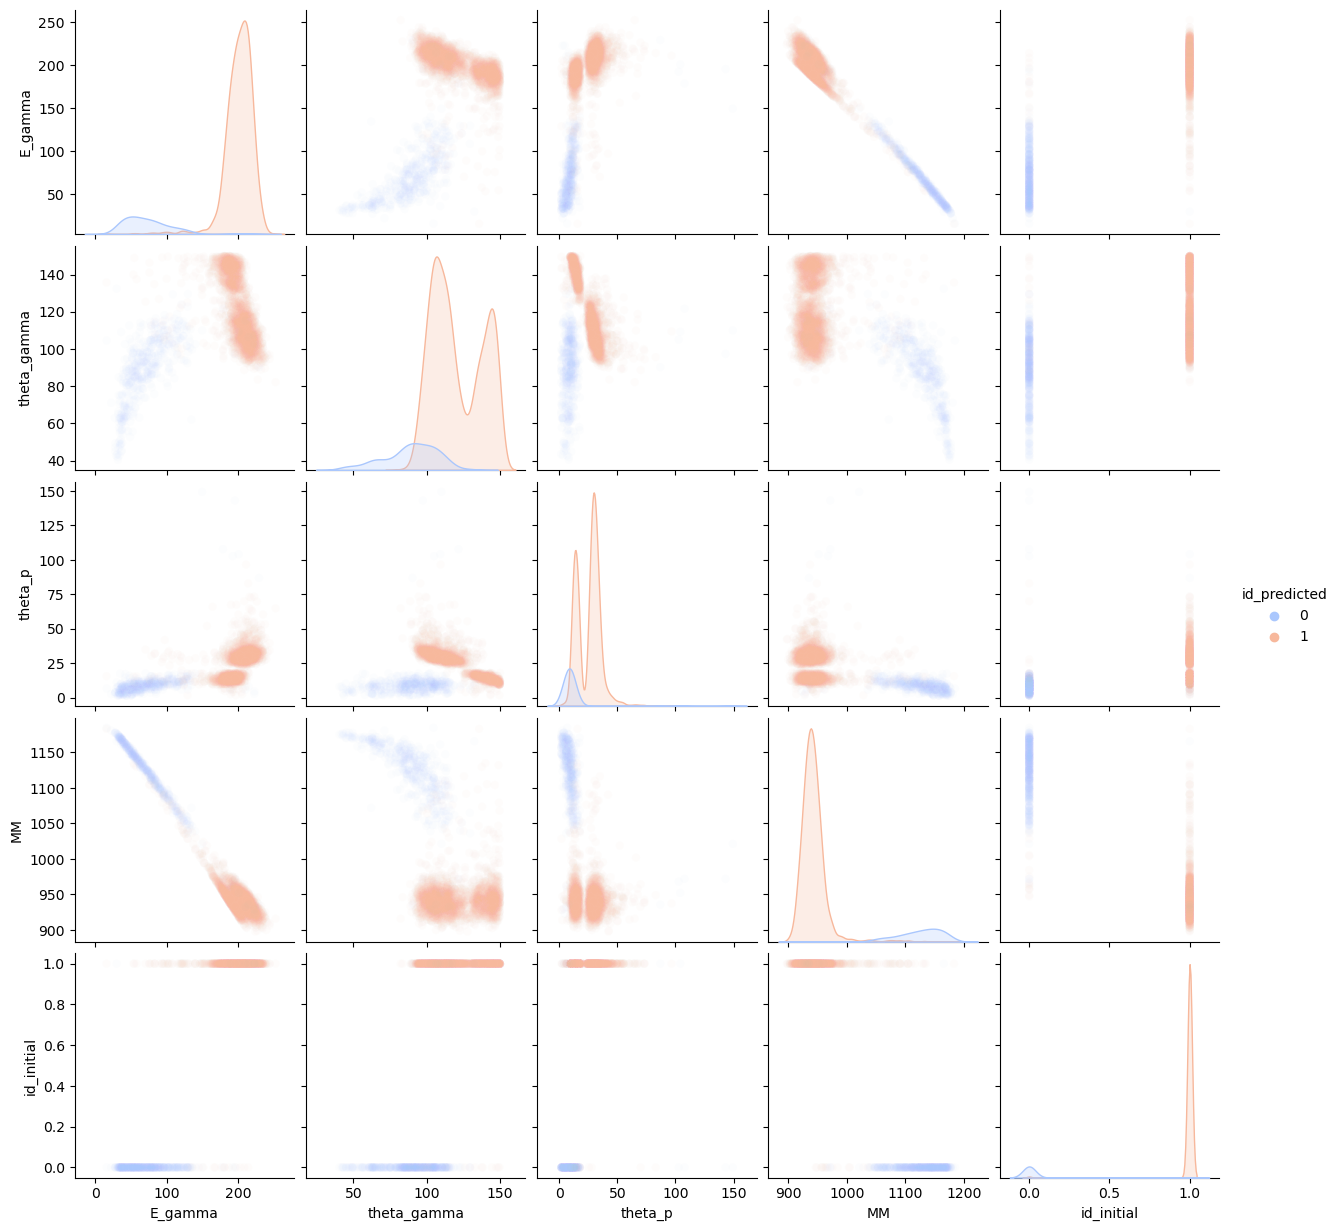

In [19]:
sns.pairplot(X_test_df, hue = "id_predicted",  kind='scatter', plot_kws={'alpha':0.03}, palette='coolwarm')

<AxesSubplot:xlabel='MM', ylabel='theta_gamma'>

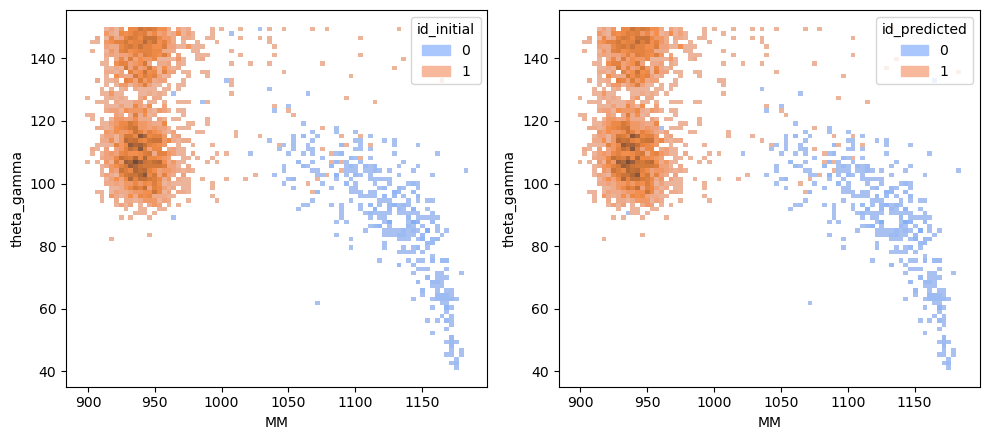

In [20]:
plt.rcParams["figure.figsize"] = [10.0, 4.5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data = X_test_df, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80, ax=axes[0])
sns.histplot(data = X_test_df, x = 'MM', y = 'theta_gamma', hue= 'id_predicted', palette='coolwarm', bins = 80, ax=axes[1])